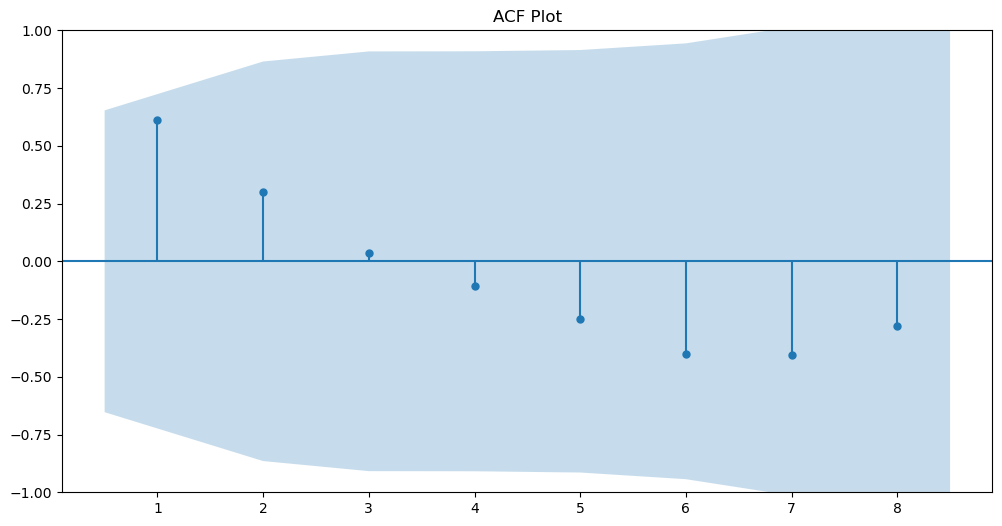

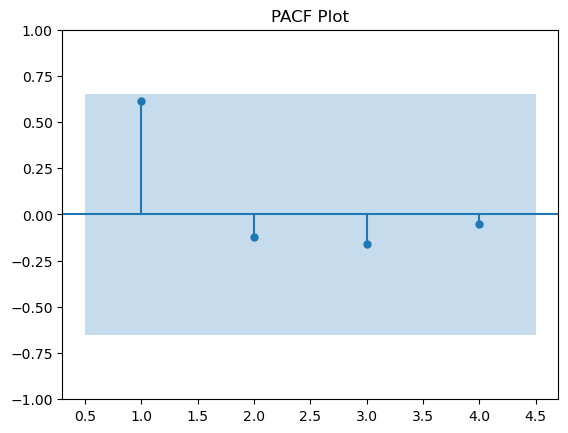

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# the data of the time series
data = [9000, 9400, 9594, 9859, 9958, 10043, 10309, 10512, 10588]
time_series = pd.Series(data)

# create the ACF and PACF plots
plt.figure(figsize=(12, 6))

# ACF plot
plot_acf(time_series, lags=8, zero=False, ax=plt.gca(), title="ACF Plot")

plt.show()

# PACF plot
plot_pacf(time_series, lags=4, zero=False, ax=plt.gca(), title="PACF Plot")

plt.show()

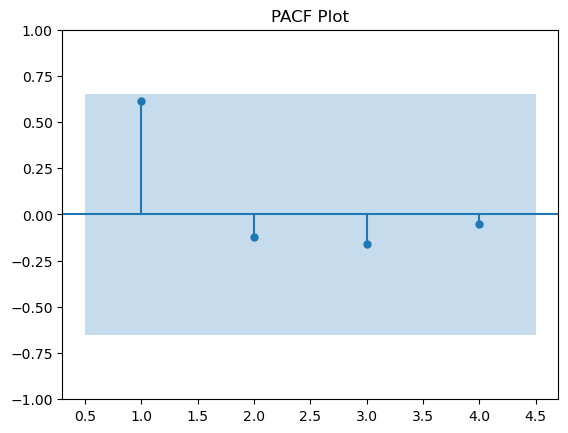

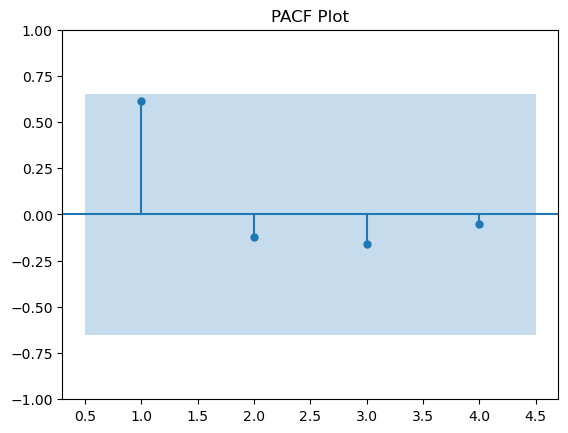

In [2]:
# PACF plot
plot_pacf(time_series, lags=4, zero=False, ax=plt.gca(), title="PACF Plot")

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import warnings

# ignore warnings
warnings.filterwarnings("ignore")

# data of the time series
data = np.array([9000, 9400, 9594, 9859, 9958, 10043, 10309, 10512, 10588])

# determine the lag order by AIC
# try different orders
aic_values = []
max_lag = len(data) - 1  # the max lag order

for lag in range(1, max_lag + 1):
    X = np.array([data[i: i+lag] for i in range(len(data)-lag)])
    try:
        model = AutoReg(data, lags=lag)  # 仅使用AR部分
        model_fit = model.fit()
        aic_values.append(model_fit.aic)
    except:
        aic_values.append(np.nan)

# print the value of AIC and BIC
print("AIC values:", aic_values)

# find the order corresponding to the minimum value of AIC and BIC
best_aic_lag = np.nanargmin(aic_values) + 1

print(f"Best AR order by AIC: {best_aic_lag}")


AIC values: [97.89500893472083, 87.19034544504407, 77.95073135189423, nan, nan, nan, nan, nan]
Best AR order by AIC: 3


In [4]:
# determine and print the matrix of auto-regression
X = np.zeros((len(data)-best_aic_lag, best_aic_lag))
Y = np.zeros((len(data)-best_aic_lag, 1))
for i in range(X.shape[0]):
    X[i, 0:] = data[i:i+best_aic_lag]
    Y[i] = data[i+best_aic_lag]
print(X)
print(Y)

[[ 9000.  9400.  9594.]
 [ 9400.  9594.  9859.]
 [ 9594.  9859.  9958.]
 [ 9859.  9958. 10043.]
 [ 9958. 10043. 10309.]
 [10043. 10309. 10512.]]
[[ 9859.]
 [ 9958.]
 [10043.]
 [10309.]
 [10512.]
 [10588.]]


## 时间序列模型的优化函数
> **如下**  
> $$ X=\begin{bmatrix}1&&9000&&9400&&9594\\1&&9400&&9594&&9889\\1&&9594&&9859&&9958\\1&&9859&&9958&&10043\\1&&9958&&10043&&10309\\1&&10043&&10309&&10512\end{bmatrix} \ Y=\begin{bmatrix}9859\\9958\\10043\\10309\\10512\\10588\end{bmatrix} \ \phi=\begin{bmatrix}\phi_0\\\phi_1\\\phi_2\\\phi_3\end{bmatrix}$$  
> 目标优化函数：$$min \ \ ( X\phi-Y)^T(X\phi-Y)$$

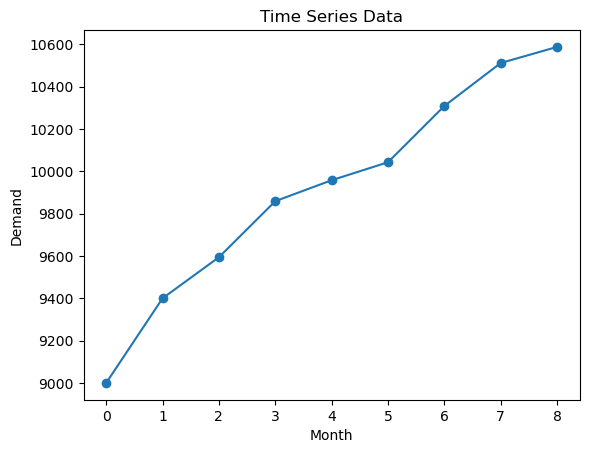

Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                    9
Model:                     AutoReg(3)   Log Likelihood                 -33.975
Method:               Conditional MLE   S.D. of innovations             69.660
Date:                Mon, 03 Mar 2025   AIC                             77.951
Time:                        09:19:40   BIC                             76.910
Sample:                             3   HQIC                            73.783
                                    9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1802.5801   1133.843      1.590      0.112    -419.712    4024.872
y.L1           0.7177      0.401      1.788      0.074      -0.069       1.505
y.L2          -0.1597      0.508     

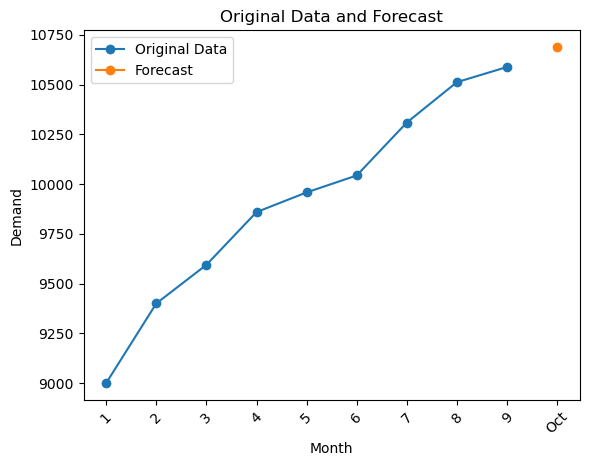

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# the data of the time series
data = [9000, 9400, 9594, 9859, 9958, 10043, 10309, 10512, 10588]
time_series = pd.Series(data)

# plots
time_series.plot(title='Time Series Data', marker='o')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.show()

# prepare the AR model
model = AutoReg(time_series, lags=3)
model_fit = model.fit()

# print the parameter
print("Model Summary:")
print(model_fit.summary())

# predict the data of Otc.
forecast = model_fit.predict(start=len(time_series), end=len(time_series))
print("Forecast for the next months:", forecast)

# plot the result of prediction
future_months = ['Oct']
plt.plot(time_series, label='Original Data', marker='o')
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label='Forecast', marker='o')
plt.xticks(range(len(time_series) + len(forecast)), list(range(1, len(time_series)+1)) + future_months, rotation=45)
plt.legend()
plt.title('Original Data and Forecast')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.show()

In [6]:
data = np.array([9000, 9400, 9594, 9859, 9958, 10043, 10309, 10512, 10588])
miu = []
scale = []
for i in range(len(data)):
    miu.append(np.mean(data[0:i]))
    scale.append(np.var(data[0:i]))
print('均值：', miu)
print('方差', scale)

均值： [nan, 9000.0, 9200.0, 9331.333333333334, 9463.25, 9562.2, 9642.333333333334, 9737.57142857143, 9834.375]
方差 [nan, 0.0, 40000.0, 61163.555555555555, 98078.6875, 117627.36000000002, 130129.55555555556, 165961.38775510204, 210812.734375]
